In [2]:
import numpy as np
import pandas as pd
import re
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import metrics
#Extra download
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf
%matplotlib inline

In [3]:
# We are using this dataset from kaggle to train our models on as well as to get our pre-processing process done: https://www.kaggle.com/ramyavidiyala/twitter-tweets-data-for-sentiment-analysis

In [4]:
#reading in the data

data = pd.read_csv("Original Datasets/tweets_data.csv", usecols=['label','tweet'])
data.head(10)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [5]:
#remove special characters
l=[]
for sentence in data.tweet:
    l.append(re.sub('[^A-Za-z]+', ' ', sentence))
data.tweet = l

In [6]:
x = data.tweet
y = data.label

In [7]:
# cleaning
#Extra download
nltk.download('stopwords')
stop = stopwords.words('english')

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
#consider removing punctuation
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

def remove_mentions(word):
    return re.sub(r"@\S+", "", word)

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

x = x.apply(remove_punctuation).apply(remove_stopwords).apply(remove_whitespace).apply(replace_newline).apply(remove_hyperlink).apply(remove_mentions).apply(remove_number)

print(x)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
0        user father dysfunctional selfish drags kids d...
1        user user thanks lyft credit use cause offer w...
2                                           bihday majesty
3                              model love u take u time ur
4                            factsguide society motivation
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwaves trying wrap mantle ge...
31959      listening sad songs monday morning otw work sad
31960    user sikh temple vandalised calgary wso condem...
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object


In [8]:
#tokenization
from nltk.tokenize import word_tokenize
#Extra download
nltk.download('punkt')
x = x.apply(word_tokenize)
print(x)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, use, cause,...
2                                        [bihday, majesty]
3                      [model, love, u, take, u, time, ur]
4                        [factsguide, society, motivation]
                               ...                        
31957                              [ate, user, isz, youuu]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object


In [9]:
#stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text])
x = x.apply(lambda text: stem_words(text))
print(x)

0        user father dysfunct selfish drag kid dysfunct...
1        user user thank lyft credit use caus offer whe...
2                                           bihday majesti
3                              model love u take u time ur
4                                  factsguid societi motiv
                               ...                        
31957                                   ate user isz youuu
31958    see nina turner airwav tri wrap mantl genuin h...
31959             listen sad song monday morn otw work sad
31960     user sikh templ vandalis calgari wso condemn act
31961                                    thank user follow
Name: tweet, Length: 31962, dtype: object


In [10]:
#bag of words using count vectorization

bag=CountVectorizer(min_df=2, max_features=1000)
bag.fit(x)

bag_df=bag.transform(x).toarray()

bag_df.shape

#bag.vocabulary_
print(bag_df)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
#split data

X_train, X_test, y_train, y_test = train_test_split(bag_df, y, test_size=0.3, random_state=0)

In [12]:
#logistic regression

lr = LogisticRegression(max_iter = 1000, penalty = 'none')
lr.fit(X_train,y_train)
lr_prediction = lr.predict(X_test)
print('Logistic Regression Score: {:.8f}'.format(lr.score(X_test,y_test)))

#multi-layered perceptron
#should mess around with optimizing parameters for both MLP and RF
# batch_size, learning rate, alpha (dropout rate), epoch, hidden_layer_sizes, max_iter
mlp = MLPClassifier(hidden_layer_sizes=(100,))
mlp.fit(X_train,y_train)
mlp_prediction = mlp.predict(X_test)
print('Multi-Layered Perceptron Score: {:.8f}'.format(mlp.score(X_test,y_test)))

#random forest classifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
#criterion = gini, n_estimators, max-depth, max_samplesrf.fit(bag_df,y_train)
rf_prediction = rf.predict(X_test)
print('Random Forest Score: {:.8f}'.format(rf.score(X_test,y_test)))

#decision tree classifier

dt = DecisionTreeClassifier(criterion="entropy", max_depth=50)
#may want to consider a max depth?
dt.fit(X_train,y_train)
dt_prediction = dt.predict(X_test)
print('Decision Tree Score: {:.8f}'.format(dt.score(X_test,y_test)))


C:\Users\Amanda\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
Logistic Regression Score: 0.94639691
Multi-Layered Perceptron Score: 0.95192408
Random Forest Score: 0.94097403
Decision Tree Score: 0.94107832


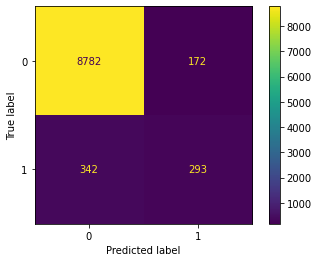

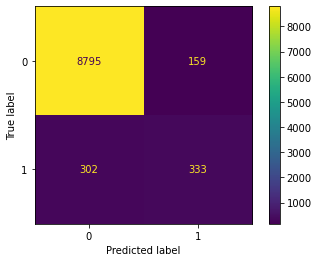

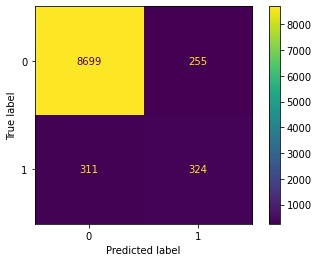

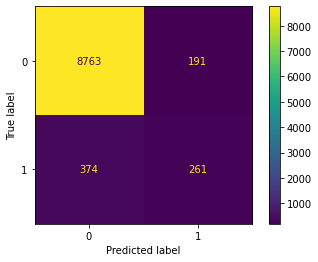

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(lr, X_test, y_test)
plt.show()

plot_confusion_matrix(mlp, X_test, y_test)
plt.show()

plot_confusion_matrix(rf, X_test, y_test)
plt.show()

plot_confusion_matrix(dt, X_test, y_test)
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
labels = ["Pos","Neg"]
print("Logistic Regression Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, lr_prediction), index=labels, columns=labels), '\n')
print("Multi-Layered Perceptron Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, mlp_prediction), index=labels, columns=labels), '\n')
print("Random Forest Classifier Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, rf_prediction), index=labels, columns=labels), '\n')
print("Decision Tree Classifier Confusion Matrix:")
print(pd.DataFrame(confusion_matrix(y_test, dt_prediction), index=labels, columns=labels), '\n')


Logistic Regression Confusion Matrix:
      Pos  Neg
Pos  8782  172
Neg   342  293 

Multi-Layered Perceptron Confusion Matrix:
      Pos  Neg
Pos  8795  159
Neg   302  333 

Random Forest Classifier Confusion Matrix:
      Pos  Neg
Pos  8699  255
Neg   311  324 

Decision Tree Classifier Confusion Matrix:
      Pos  Neg
Pos  8763  191
Neg   374  261 



In [15]:
from sklearn.metrics import classification_report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_prediction), '\n')
print("Multi-Layered Perceptron Classification Report:")
print(classification_report(y_test, mlp_prediction), '\n')
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_prediction), '\n')
print("Decision Tree Classifier Classification Report:")
print(classification_report(y_test, dt_prediction), '\n')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8954
           1       0.63      0.46      0.53       635

    accuracy                           0.95      9589
   macro avg       0.80      0.72      0.75      9589
weighted avg       0.94      0.95      0.94      9589
 

Multi-Layered Perceptron Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8954
           1       0.68      0.52      0.59       635

    accuracy                           0.95      9589
   macro avg       0.82      0.75      0.78      9589
weighted avg       0.95      0.95      0.95      9589
 

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8954
           1       0.56      0.51      0.53       635

    accuracy                           

In [16]:
#Cross Validation for our best model, mlp

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
clf = MLPClassifier(hidden_layer_sizes=(100,))

for train_indices, test_indices in kf.split(bag_df):
    clf.fit(bag_df[train_indices], y[train_indices])
    print(clf.score(bag_df[test_indices], y[test_indices]))

0.9496324104489285
0.9436884091975598
0.9497809762202754
0.9430538172715894
0.9480600750938674


In [17]:
#use our model to predict up/down trends based on (previous days sentiment)

#weigh the negative tweets (1) more than positive/neutral tweets (0)

#percent change yahoo finance (close - open)/open

#graph our predicted percent change (from the opening to a predicted closing) based on a given days sentiment 

#History returns open, high, and low for month period
#Data type is pandas DataFrame
amzn_hist = yf.Ticker("AMZN").history(period="1mo")
#appl_hist = yf.Ticker("APPL").history(period="1mo")
btc_hist = yf.Ticker("BTC").history(period="1mo")
#doge_hist = yf.Ticker("DOGE").history(period="1mo")
gme_hist = yf.Ticker("GME").history(period="1mo")
tsla_hist = yf.Ticker("TSLA").history(period="1mo")

#Indexing open for 2021-04-20 through 2021-05-05
open_dates = (20210420, 20210421, 20210422, 20210423, 20210426, 20210427, 20210428, 20210429, 20210430, 20210503, 20210504, 20210505)
amzn = {}
appl = {}
btc = {}
doge = {}
gme = {}
tsla = {}


for date in open_dates:
    amzn[date]= [amzn_hist[date]["open"], amzn_hist_[date]["close"]]
    #appl[date]= [amzn_hist[date]["open"], amzn_hist_[date]["close"]]
    btc[date]= [btc_hist[date]["open"], btc_hist_[date]["close"]]
    #doge[date]= [amzn_hist[date]["open"], amzn_hist_[date]["close"]]
    gme[date]= [gme_hist[date]["open"], gme_hist_[date]["close"]]
    tsla[date]= [tsla_hist[date]["open"], tsla_hist_[date]["close"]]

KeyError: 20210420

In [49]:
#Function to assist with importing and formating tweets
def transform_tweet(new_file):
    data_doge_421 = pd.read_csv(new_file, usecols=['tweet'])
    data_doge_421.head(10)
    l_doge_421=[]
    for sentence in data_doge_421.tweet:
        l_doge_421.append(re.sub('[^A-Za-z]+', ' ', sentence))
    data_doge_421.tweet = l_doge_421
    x_doge_421 = data_doge_421.tweet   
    x_doge_421 = x_doge_421.apply(remove_punctuation).apply(remove_stopwords).apply(remove_whitespace).apply(replace_newline).apply(remove_hyperlink).apply(remove_mentions).apply(remove_number)
    x_doge_421 = x_doge_421.apply(word_tokenize)
    x_doge_421 = x_doge_421.apply(lambda text: stem_words(text))
    bag.fit(x_doge_421)
    bag_df_doge_421=bag.transform(x_doge_421).toarray()
    return bag_df_doge_421

doge_4_20 = clf.predict(transform_tweet("TwitterData/DOGE/4_20_DOGE_Data.csv"))
print(doge_4_20)
doge_4_21 = clf.predict(transform_tweet("TwitterData/DOGE/4_21_DOGE_Data.csv"))
doge_4_22 = clf.predict(transform_tweet("TwitterData/DOGE/4_22_DOGE_Data.csv"))
doge_4_23 = clf.predict(transform_tweet("TwitterData/DOGE/4_23_DOGE_Data.csv"))
doge_4_24 = clf.predict(transform_tweet("TwitterData/DOGE/4_24_DOGE_Data.csv"))
doge_4_25 = clf.predict(transform_tweet("TwitterData/DOGE/4_25_DOGE_Data.csv"))
doge_4_26 = clf.predict(transform_tweet("TwitterData/DOGE/4_26_DOGE_Data.csv"))
doge_4_27 = clf.predict(transform_tweet("TwitterData/DOGE/4_27_DOGE_Data.csv"))
doge_4_28 = clf.predict(transform_tweet("TwitterData/DOGE/4_28_DOGE_Data.csv"))
doge_4_29 = clf.predict(transform_tweet("TwitterData/DOGE/4_29_DOGE_Data.csv"))
doge_4_30 = clf.predict(transform_tweet("TwitterData/DOGE/4_30_DOGE_Data.csv"))
doge_5_1 = clf.predict(transform_tweet("TwitterData/DOGE/5_1_DOGE_Data.csv"))
doge_5_2 = clf.predict(transform_tweet("TwitterData/DOGE/5_2_DOGE_Data.csv"))
doge_5_3 = clf.predict(transform_tweet("TwitterData/DOGE/5_3_DOGE_Data.csv"))
doge_5_4 = clf.predict(transform_tweet("TwitterData/DOGE/5_4_DOGE_Data.csv"))
doge_5_5 = clf.predict(transform_tweet("TwitterData/DOGE/5_5_DOGE_Data.csv"))

amzn_4_20 = clf.predict(transform_tweet("TwitterData/AMZN/4_20_AMZN_Data.csv"))
amzn_4_21 = clf.predict(transform_tweet("TwitterData/AMZN/4_21_AMZN_Data.csv"))
amzn_4_22 = clf.predict(transform_tweet("TwitterData/AMZN/4_22_AMZN_Data.csv"))
amzn_4_23 = clf.predict(transform_tweet("TwitterData/AMZN/4_23_AMZN_Data.csv"))
amzn_4_25 = clf.predict(transform_tweet("TwitterData/AMZN/4_25_AMZN_Data.csv"))
amzn_4_26 = clf.predict(transform_tweet("TwitterData/AMZN/4_26_AMZN_Data.csv"))
amzn_4_27 = clf.predict(transform_tweet("TwitterData/AMZN/4_27_AMZN_Data.csv"))
amzn_4_28 = clf.predict(transform_tweet("TwitterData/AMZN/4_28_AMZN_Data.csv"))
amzn_4_29 = clf.predict(transform_tweet("TwitterData/AMZN/4_29_AMZN_Data.csv"))
amzn_4_30 = clf.predict(transform_tweet("TwitterData/AMZN/4_30_AMZN_Data.csv"))
amzn_5_1 = clf.predict(transform_tweet("TwitterData/AMZN/5_1_AMZN_Data.csv"))
amzn_5_2 = clf.predict(transform_tweet("TwitterData/AMZN/5_2_AMZN_Data.csv"))
amzn_5_3 = clf.predict(transform_tweet("TwitterData/AMZN/5_3_AMZN_Data.csv"))
amzn_5_4 = clf.predict(transform_tweet("TwitterData/AMZN/5_4_AMZN_Data.csv"))
amzn_5_5 = clf.predict(transform_tweet("TwitterData/AMZN/5_5_AMZN_Data.csv"))

appl_4_20 = clf.predict(transform_tweet("TwitterData/APPL/4_20_APPL_Data.csv"))
appl_4_21 = clf.predict(transform_tweet("TwitterData/APPL/4_21_APPL_Data.csv"))
appl_4_23 = clf.predict(transform_tweet("TwitterData/APPL/4_23_APPL_Data.csv"))
appl_4_25 = clf.predict(transform_tweet("TwitterData/APPL/4_25_APPL_Data.csv"))
appl_4_26 = clf.predict(transform_tweet("TwitterData/APPL/4_26_APPL_Data.csv"))
appl_4_27 = clf.predict(transform_tweet("TwitterData/APPL/4_27_APPL_Data.csv"))
appl_4_28 = clf.predict(transform_tweet("TwitterData/APPL/4_28_APPL_Data.csv"))
appl_4_29 = clf.predict(transform_tweet("TwitterData/APPL/4_29_APPL_Data.csv"))
appl_4_30 = clf.predict(transform_tweet("TwitterData/APPL/4_30_APPL_Data.csv"))
appl_5_1 = clf.predict(transform_tweet("TwitterData/APPL/5_1_APPL_Data.csv"))
appl_5_2 = clf.predict(transform_tweet("TwitterData/APPL/5_2_APPL_Data.csv"))

btc_4_20 = clf.predict(transform_tweet("TwitterData/BTC/4_20_BTC_Data.csv"))
btc_4_21 = clf.predict(transform_tweet("TwitterData/BTC/4_21_BTC_Data.csv"))
btc_4_23 = clf.predict(transform_tweet("TwitterData/BTC/4_23_BTC_Data.csv"))
btc_4_27 = clf.predict(transform_tweet("TwitterData/BTC/4_27_BTC_Data.csv"))
btc_4_28 = clf.predict(transform_tweet("TwitterData/BTC/4_28_BTC_Data.csv"))
btc_4_29 = clf.predict(transform_tweet("TwitterData/BTC/4_29_BTC_Data.csv"))
btc_4_30 = clf.predict(transform_tweet("TwitterData/BTC/4_30_BTC_Data.csv"))
btc_5_1 = clf.predict(transform_tweet("TwitterData/BTC/5_1_BTC_Data.csv"))
btc_5_2 = clf.predict(transform_tweet("TwitterData/BTC/5_2_BTC_Data.csv"))
btc_5_3 = clf.predict(transform_tweet("TwitterData/BTC/5_3_BTC_Data.csv"))
btc_5_4 = clf.predict(transform_tweet("TwitterData/BTC/5_4_BTC_Data.csv"))

gme_4_20 = clf.predict(transform_tweet("TwitterData/GME/4_20_GME_Data.csv"))
gme_4_21 = clf.predict(transform_tweet("TwitterData/GME/4_21_GME_Data.csv"))
gme_4_22 = clf.predict(transform_tweet("TwitterData/GME/4_22_GME_Data.csv"))
gme_4_25 = clf.predict(transform_tweet("TwitterData/GME/4_25_GME.csv"))
gme_4_26 = clf.predict(transform_tweet("TwitterData/GME/4_26_GME_Data.csv"))
gme_4_27 = clf.predict(transform_tweet("TwitterData/GME/4_27_GME_Data.csv"))
gme_4_28 = clf.predict(transform_tweet("TwitterData/GME/4_28_GME_Data.csv"))
gme_4_29 = clf.predict(transform_tweet("TwitterData/GME/4_29_GME_Data.csv"))
gme_4_30 = clf.predict(transform_tweet("TwitterData/GME/4_30_GME_Data.csv"))
gme_5_1 = clf.predict(transform_tweet("TwitterData/GME/5_1_GME_Data.csv"))
gme_5_2 = clf.predict(transform_tweet("TwitterData/GME/5_2_GME_Data.csv"))
gme_5_3 = clf.predict(transform_tweet("TwitterData/GME/5_3_GME_Data.csv"))
gme_5_4 = clf.predict(transform_tweet("TwitterData/GME/5_4_GME_Data.csv"))
gme_5_5 = clf.predict(transform_tweet("TwitterData/GME/5_5_GME_Data.csv"))

tsla_4_20 = clf.predict(transform_tweet("TwitterData/Tesla/4_20_TESLA_Data.csv"))
tsla_4_22 = clf.predict(transform_tweet("TwitterData/Tesla/4_22_TESLA_Data.csv"))
tsla_4_24 = clf.predict(transform_tweet("TwitterData/Tesla/4_24_TESLA_Data.csv"))
tsla_4_25 = clf.predict(transform_tweet("TwitterData/Tesla/4_25_TESLA_Data.csv"))
tsla_4_26 = clf.predict(transform_tweet("TwitterData/Tesla/4_26_TESLA_Data.csv"))
tsla_4_27 = clf.predict(transform_tweet("TwitterData/Tesla/4_27_TESLA_Data.csv"))
tsla_4_28 = clf.predict(transform_tweet("TwitterData/Tesla/4_28_TESLA_Data.csv"))
tsla_4_29 = clf.predict(transform_tweet("TwitterData/Tesla/4_29_TESLA_Data.csv"))
tsla_4_30 = clf.predict(transform_tweet("TwitterData/Tesla/4_30_TESLA_Data.csv"))
tsla_5_1 = clf.predict(transform_tweet("TwitterData/Tesla/5_1_TESLA_Data.csv"))
tsla_5_2 = clf.predict(transform_tweet("TwitterData/Tesla/5_2_TESLA_Data.csv"))
tsla_5_3 = clf.predict(transform_tweet("TwitterData/Tesla/5_3_TESLA_Data.csv"))
tsla_5_4 = clf.predict(transform_tweet("TwitterData/Tesla/5_4_TESLA_Data.csv"))
tsla_5_5 = clf.predict(transform_tweet("TwitterData/Tesla/5_5_TESLA_Data.csv"))

[0 0 0 ... 0 0 0]


In [69]:
#Due to the unreliable nature of the yfinance API, we are hardcoding the data for this projects analysis 
open_dates = ("4/20/21", "4/21/21", "4/22/21", "4/23/21", "4/26/21", "4/27/21", "4/28/21", "4/29/21", "4/30/21", "5/03/21", "5/04/21", "5/05/21")
doge_4_20 = clf.predict(transform_tweet("TwitterData/DOGE/4_20_DOGE_Data.csv"))
doge_4_21 = clf.predict(transform_tweet("TwitterData/DOGE/4_21_DOGE_Data.csv"))
doge_4_22 = clf.predict(transform_tweet("TwitterData/DOGE/4_22_DOGE_Data.csv"))
doge_4_23 = clf.predict(transform_tweet("TwitterData/DOGE/4_23_DOGE_Data.csv"))
doge_4_24 = clf.predict(transform_tweet("TwitterData/DOGE/4_24_DOGE_Data.csv"))
doge_4_25 = clf.predict(transform_tweet("TwitterData/DOGE/4_25_DOGE_Data.csv"))
doge_4_26 = clf.predict(transform_tweet("TwitterData/DOGE/4_26_DOGE_Data.csv"))
doge_4_27 = clf.predict(transform_tweet("TwitterData/DOGE/4_27_DOGE_Data.csv"))
doge_4_28 = clf.predict(transform_tweet("TwitterData/DOGE/4_28_DOGE_Data.csv"))
doge_4_29 = clf.predict(transform_tweet("TwitterData/DOGE/4_29_DOGE_Data.csv"))
doge_4_30 = clf.predict(transform_tweet("TwitterData/DOGE/4_30_DOGE_Data.csv"))
doge_5_1 = clf.predict(transform_tweet("TwitterData/DOGE/5_1_DOGE_Data.csv"))
doge_5_2 = clf.predict(transform_tweet("TwitterData/DOGE/5_2_DOGE_Data.csv"))
doge_5_3 = clf.predict(transform_tweet("TwitterData/DOGE/5_3_DOGE_Data.csv"))
doge_5_4 = clf.predict(transform_tweet("TwitterData/DOGE/5_4_DOGE_Data.csv"))
doge_5_5 = clf.predict(transform_tweet("TwitterData/DOGE/5_5_DOGE_Data.csv"))
amzn = {
    "4/20/21" : [3373.60, 3334.69],
    "4/21/21" : [3316.00, 3362.02],
    "4/22/21" : [3371.68, 3309.04],
    "4/23/21" : [3319.10, 3340.88],
    "4/26/21" : [3348.00, 3409.00],
    "4/27/21" : [3443.47, 3417.43],
    "4/28/21" : [3434.80, 3458.50],
    "4/29/21" : [3505.10, 3471.31],
    "4/30/21" : [3525.12, 3467.42],
    "5/03/21" : [3484.73, 3386.49],
    "5/04/21" : [3356.19, 3299.41],
    "5/05/21" : [3338.85, 3270.54]
}
appl = {
    "4/20/21" : [135.02, 133.11],
    "4/21/21" : [132.36, 133.50],
    "4/22/21" : [133.04, 131.94],
    "4/23/21" : [132.16, 134.32],
    "4/26/21" : [134.83, 134.72],
    "4/27/21" : [135.01, 134.39],
    "4/28/21" : [134.31, 133.58],
    "4/29/21" : [136.47, 133.48],
    "4/30/21" : [131.78, 131.46],
    "5/03/21" : [132.04, 132.54],
    "5/04/21" : [131.19, 127.32],
    "5/05/21" : [129.20, 128.10]
}
btc = {
    "4/20/21" : [55681.79, 56473.03],
    "4/21/21" : [56471.13, 53906.09],
    "4/22/21" : [53857.11, 51762.27],
    "4/23/21" : [51739.81, 51093.65],
    "4/26/21" : [49077.79, 54021.75],
    "4/27/21" : [54030.30, 55033.12],
    "4/28/21" : [55036.64, 54824.70],
    "4/29/21" : [54858.09, 53555.11],
    "4/30/21" : [53568.66, 57750.18],
    "5/03/21" : [56620.27, 57200.29],
    "5/04/21" : [57045.34, 54213.21],
    "5/05/21" : [57547.74, 57450.78]
}
doge = {
    "4/20/21" : [0.4084, 0.3195],
    "4/21/21" : [0.3170, 0.3069],
    "4/22/21" : [0.3060, 0.2610],
    "4/23/21" : [0.2610, 0.2485],
    "4/26/21" : [0.2512, 0.2707],
    "4/27/21" : [0.2714, 0.2722],
    "4/28/21" : [0.2723, 0.3237],
    "4/29/21" : [0.3232, 0.3052],
    "4/30/21" : [0.3047, 0.3376],
    "5/03/21" : [0.3736, 0.4417],
    "5/04/21" : [0.4466, 0.5605],
    "5/05/21" : [0.6529, 0.6350]
}
gme = {
    "4/20/21" : [164.14, 158.53],
    "4/21/21" : [158.40, 158.51],
    "4/22/21" : [159.10, 151.17],
    "4/23/21" : [159.10, 151.17],
    "4/26/21" : [150.98, 168.93],
    "4/27/21" : [183.55, 177.77],
    "4/28/21" : [172.10, 178.58],
    "4/29/21" : [176.56, 176.19],
    "4/30/21" : [175.00, 173.59],
    "5/03/21" : [177.49, 162.20],
    "5/04/21" : [159.00, 160.39],
    "5/05/21" : [161.83, 159.48]
}
tsla = {
    "4/20/21" : [717.42, 718.99],
    "4/21/21" : [704.77, 744.12],
    "4/22/21" : [741.50, 719.69],
    "4/23/21" : [719.80, 729.40],
    "4/26/21" : [741.00, 738.20],
    "4/27/21" : [717.96, 704.74],
    "4/28/21" : [696.41, 694.40],
    "4/29/21" : [699.51, 677.00],
    "4/30/21" : [667.59, 709.44],
    "5/03/21" : [703.80, 684.90],
    "5/04/21" : [678.94, 673.60],
    "5/05/21" : [681.06, 670.94]
    }

amzn_percent_change = []
appl_percent_change = []
btc_percent_change = []
doge_percent_change = []
gme_percent_change = []
tsla_percent_change = []

for date in open_dates:
    amzn_percent_change.append((amzn[date][1] - amzn[date][0])/amzn[date][0])
    appl_percent_change.append((appl[date][1] - appl[date][0])/appl[date][0])
    btc_percent_change.append((btc[date][1] - btc[date][0])/btc[date][0])
    doge_percent_change.append((doge[date][1] - doge[date][0])/doge[date][0])
    gme_percent_change.append((gme[date][1] - gme[date][0])/gme[date][0])
    tsla_percent_change.append((tsla[date][1] - tsla[date][0])/tsla[date][0])


In [70]:
amzn_avg_change = sum(amzn_percent_change)/len(amzn_percent_change)
print(amzn_avg_change)
appl_avg_change = sum(appl_percent_change)/len(appl_percent_change)
print(appl_avg_change)
btc_avg_change = sum(btc_percent_change)/len(btc_percent_change)
print(btc_avg_change)
doge_avg_change = sum(doge_percent_change)/len(doge_percent_change)
print(doge_avg_change)
gme_avg_change = sum(gme_percent_change)/len(gme_percent_change)
print(gme_avg_change)
tsla_avg_change = sum(tsla_percent_change)/len(tsla_percent_change)
print(tsla_avg_change)

doge_4_20 = int(1-((len(doge_4_20)-sum(doge_4_20))/len(doge_4_20))) 
doge_4_21 = int(1-((len(doge_4_21)-sum(doge_4_21))/len(doge_4_21)))
doge_4_22 = int(1-((len(doge_4_22)-sum(doge_4_22))/len(doge_4_22)))
doge_4_23 = int(1-((len(doge_4_23)-sum(doge_4_23))/len(doge_4_23)))
doge_4_24 = int(1-((len(doge_4_24)-sum(doge_4_24))/len(doge_4_24)))
doge_4_25 = int(1-((len(doge_4_25)-sum(doge_4_25))/len(doge_4_25)))
doge_4_26 = int(1-((len(doge_4_26)-sum(doge_4_26))/len(doge_4_26)))
doge_4_27 = int(1-((len(doge_4_27)-sum(doge_4_27))/len(doge_4_27)))
doge_4_28 = int(1-((len(doge_4_28)-sum(doge_4_28))/len(doge_4_28)))
doge_4_29 = int(-((len(doge_4_29)-sum(doge_4_29))/len(doge_4_29)))
doge_4_30 = int(1-((len(doge_4_30)-sum(doge_4_30))/len(doge_4_30)))
doge_5_1 = int(1-((len(doge_5_1)-sum(doge_5_1))/len(doge_5_1)))
doge_5_2 = int(1-((len(doge_5_2)-sum(doge_5_2))/len(doge_5_2)))
doge_5_3 = int(1-((len(doge_5_3)-sum(doge_5_3))/len(doge_5_3)))
doge_5_4 = int(1-((len(doge_5_4)-sum(doge_5_4))/len(doge_5_4)))
doge_5_5 = int(1-((len(doge_5_5)-sum(doge_5_5))/len(doge_5_5)))
doge_4_21_pred = (doge_4_20 / doge_4_21) * doge["4/21/21"]
doge_4_22_pred = (doge_4_21 / doge_4_22) * doge["4/22/21"]
doge_4_23_pred =(doge_4_22 / doge_4_23) * doge["4/23/21"]
doge_4_26_pred=(doge_4_25 / doge_4_26) * doge["4/26/21"]
doge_4_27_pred=(doge_4_26 / doge_4_27) * doge["4/27/21"]
doge_4_28_pred=(doge_4_27 / doge_4_281) * doge["4/28/21"]
doge_4_29_pred=(doge_4_28 / doge_4_29) * doge["4/29/21"]
doge_4_30_pred=(doge_4_29 / doge_4_30) * doge["4/30/21"]
doge_5_3_pred=(doge_5_2 / doge_5_3) * doge["5/5/21"]
doge_5_4_pred=(doge_5_3 / doge_5_4) * doge["5/5/21"]
doge_5_5_pred=(doge_5_4 / doge_5_5) * doge["5/5/21"]

amzn_4_20 = sum(amzn_4_20)/len(amzn_4_20)
amzn_4_21 = sum(amzn_4_21)/len(amzn_4_21)
amzn_4_22 = sum(amzn_4_22)/len(amzn_4_22)
amzn_4_23 = sum(amzn_4_23)/len(amzn_4_23)
amzn_4_25 = sum(amzn_4_25)/len(amzn_4_25)
amzn_4_26 = sum(amzn_4_26)/len(amzn_4_26)
amzn_4_27 = sum(amzn_4_27)/len(amzn_4_27)
amzn_4_28 = sum(amzn_4_28)/len(amzn_4_28)
amzn_4_29 = sum(amzn_4_29)/len(amzn_4_29)
amzn_4_30 = sum(amzn_4_30)/len(amzn_4_30)
amzn_5_1 = sum(amzn_5_1)/len(amzn_5_1)
amzn_5_2 = sum(amzn_5_2)/len(amzn_5_2)
amzn_5_3 = sum(amzn_5_3)/len(amzn_5_3)
amzn_5_4 = sum(amzn_5_4)/len(amzn_5_4)
amzn_5_5 = sum(amzn_5_5)/len(amzn_5_5)

appl_4_20 = sum(appl_4_20)/len(appl_4_20)
appl_4_21 = sum(appl_4_21)/len(appl_4_21)
appl_4_23 = sum(appl_4_23)/len(appl_4_23)
appl_4_25 = sum(appl_4_25)/len(appl_4_25)
appl_4_26 = sum(appl_4_26)/len(appl_4_26)
appl_4_27 = sum(appl_4_27)/len(appl_4_27)
appl_4_28 = sum(appl_4_28)/len(appl_4_28)
appl_4_29 = sum(appl_4_29)/len(appl_4_29)
appl_4_30 = sum(appl_4_30)/len(appl_4_30)
appl_5_1 = sum(appl_5_1)/len(appl_5_1)
appl_5_2 = sum(appl_5_2)/len(appl_5_2)

btc_4_20 = sum(btc_4_20)/len(btc_4_20)
btc_4_21 = sum(btc_4_21)/len(btc_4_21)
btc_4_23 = sum(btc_4_23)/len(btc_4_23)
btc_4_27 = sum(btc_4_27)/len(btc_4_27)
btc_4_28 = sum(btc_4_28)/len(btc_4_28)
btc_4_29 = sum(btc_4_29)/len(btc_4_29)
btc_4_30 = sum(btc_4_30)/len(btc_4_30)
btc_5_1 = sum(btc_5_1)/len(btc_5_1)
btc_5_2 = sum(btc_5_2)/len(btc_5_2)
btc_5_3 = sum(btc_5_3)/len(btc_5_3)
btc_5_4 = sum(btc_5_4)/len(btc_5_4)

gme_4_20 = sum(gme_4_20)/len(gme_4_20)
gme_4_21 = sum(gme_4_21)/len(gme_4_21)
gme_4_22 = sum(gme_4_22)/len(gme_4_22)
gme_4_25 = sum(gme_4_25)/len(gme_4_25)
gme_4_26 = sum(gme_4_26)/len(gme_4_26)
gme_4_27 = sum(gme_4_27)/len(gme_4_27)
gme_4_28 = sum(gme_4_28)/len(gme_4_28)
gme_4_29 = sum(gme_4_29)/len(gme_4_29)
gme_4_30 = sum(gme_4_30)/len(gme_4_30)
gme_5_1 = sum(gme_5_1)/len(gme_5_1)
gme_5_2 = sum(gme_5_2)/len(gme_5_2)
gme_5_3 = sum(gme_5_3)/len(gme_5_3)
gme_5_4 = sum(gme_5_4)/len(gme_5_4)
gme_5_5 = sum(gme_5_5)/len(gme_5_5)

tsla_4_20 = sum(tsla_4_20)/len(tsla_4_20)
tsla_4_22 = sum(tsla_4_22)/len(tsla_4_22)
tsla_4_24 = sum(tsla_4_24)/len(tsla_4_24)
tsla_4_25 = sum(tsla_4_25)/len(tsla_4_25)
tsla_4_26 = sum(tsla_4_26)/len(tsla_4_26)
tsla_4_27 = sum(tsla_4_27)/len(tsla_4_27)
tsla_4_28 = sum(tsla_4_28)/len(tsla_4_28)
tsla_4_29 = sum(tsla_4_29)/len(tsla_4_29)
tsla_4_30 = sum(tsla_4_30)/len(tsla_4_30)
tsla_5_1 = sum(tsla_5_1)/len(tsla_5_1)
tsla_5_2 = sum(tsla_5_2)/len(tsla_5_2)
tsla_5_3 = sum(tsla_5_3)/len(tsla_5_3)
tsla_5_4 = sum(tsla_5_4)/len(tsla_5_4)
tsla_5_5 = sum(tsla_5_5)/len(tsla_5_5)

-0.006974273356738514
-0.005572090971553479
0.003839087989298455
0.023919199735207498
-0.009182896492839822
-0.00018353263218347815


ZeroDivisionError: division by zero

In [45]:
fig, ax = plt.subplots()
ax.plot(open_dates, amzn_percent_change)
plt.xticks(rotation=45)
ax.set_title('Amazon')

fig, ax = plt.subplots()
ax.plot(open_dates, appl_percent_change)
plt.xticks(rotation=45)
ax.set_title('Apple')

fig, ax = plt.subplots()
ax.plot(open_dates, btc_percent_change)
plt.xticks(rotation=45)
ax.set_title('Bitcoin')

fig, ax = plt.subplots()
ax.plot(open_dates, doge_percent_change)
ax.plot(open_dates, [doge_4_22_pred, doge_4_23_pred, doge_4_26_pred, doge_4_27_pred, doge_4_28_pred, doge_4_29_pred, doge_4_30_pred, doge_5_3_pred, doge_5_4_pred, doge_5_5_pred])
plt.xticks(rotation=45)
ax.set_title('Dogecoin')

fig, ax = plt.subplots()
ax.plot(open_dates, gme_percent_change)
plt.xticks(rotation=45)
ax.set_title('Gamestop')

fig, ax = plt.subplots()
ax.plot(open_dates, tsla_percent_change)
plt.xticks(rotation=45)
ax.set_title('Tesla')

NameError: name 'doge_4_22_pred' is not defined